Modelo: Logistic Regression
Precisión: 0.6890
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        97
           1       0.50      0.55      0.52        31
           2       0.35      0.25      0.29        36

    accuracy                           0.69       164
   macro avg       0.56      0.57      0.56       164
weighted avg       0.67      0.69      0.67       164

--------------------------------------------------
Modelo: K-Nearest Neighbors
Precisión: 0.9756
              precision    recall  f1-score   support

           0       0.99      0.98      0.98        97
           1       1.00      0.97      0.98        31
           2       0.92      0.97      0.95        36

    accuracy                           0.98       164
   macro avg       0.97      0.97      0.97       164
weighted avg       0.98      0.98      0.98       164

--------------------------------------------------
Modelo: Random Forest
Precisión: 0.9939
    

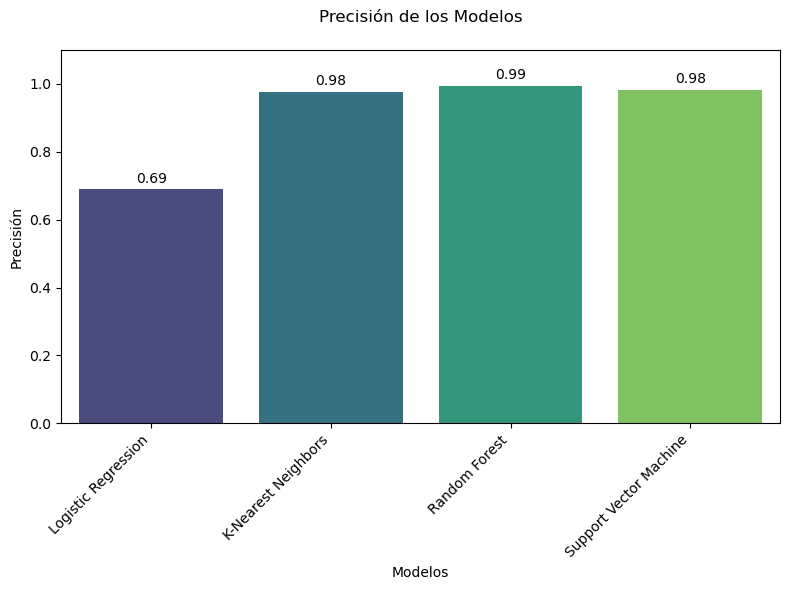

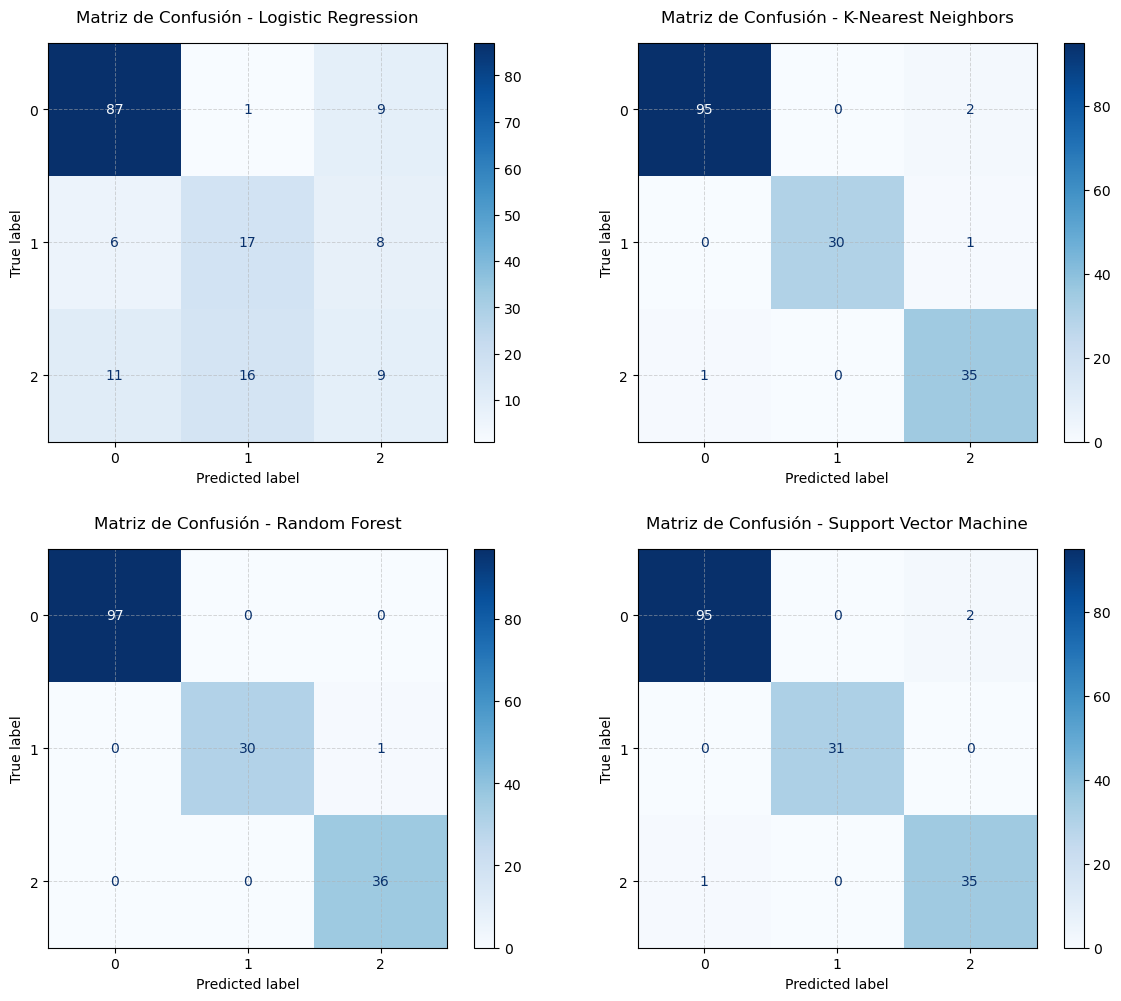

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')

# Cargar el DataFrame combinado desde un archivo CSV
df_combinado = pd.read_csv('output_Combinado_Kmeans.csv')

# Preparación de los datos
label_encoder = LabelEncoder()
df_combinado['tipo_consulta_encoded'] = label_encoder.fit_transform(df_combinado['tipo_consulta'])
X = df_combinado[['Cantidad_pacientes', 'tipo_consulta_encoded', 'porcentaje_consulta']]
y = df_combinado['cluster']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

# Modelos a evaluar
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Support Vector Machine': SVC(random_state=42)
}

# Entrenar y evaluar modelos
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"Modelo: {name}")
    print(f"Precisión: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))
    print("-" * 50)

# Gráfico de Barras de Precisión de los Modelos con ajustes en las etiquetas
plt.figure(figsize=(8, 6))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette="viridis")
plt.title("Precisión de los Modelos", pad=20)
plt.xlabel("Modelos")
plt.ylabel("Precisión")
plt.ylim(0, 1.1)  # Ampliar el límite superior para evitar superposición
plt.xticks(rotation=45, ha="right")

# Ajustar la posición de las etiquetas de precisión
for i, acc in enumerate(results.values()):
    plt.text(i, acc + 0.02, f"{acc:.2f}", ha="center", fontsize=10)  # Mover etiquetas más arriba

plt.tight_layout()
plt.show()

# Matrices de Confusión para todos los modelos
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
for ax, (name, model) in zip(axes.flatten(), models.items()):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap="Blues", values_format="d", ax=ax)
    ax.set_title(f"Matriz de Confusión - {name}", pad=15)
    ax.grid(visible=True, linestyle='--', linewidth=0.7, alpha=0.5)
plt.tight_layout(h_pad=3.0, w_pad=2.0)
plt.show()

# Análisis Completo del Rendimiento de los Modelos de Machine Learning

## 1. Evaluación de Precisión por Modelo
El gráfico de barras muestra las precisiones alcanzadas por los modelos. Los resultados son los siguientes:

- **Logistic Regression**:
  - **Precisión:** 68.90%.
  - Es el modelo con el rendimiento más bajo.
  - Problemas para diferenciar correctamente entre los clústeres, especialmente en las clases minoritarias (clústeres 1 y 2).

- **K-Nearest Neighbors (KNN)**:
  - **Precisión:** 97.56%.
  - Alto rendimiento, con un buen equilibrio entre precisión y recall en todos los clústeres.
  - Algunas confusiones menores, pero sigue siendo confiable.

- **Random Forest**:
  - **Precisión:** 99.39%.
  - El modelo más preciso.
  - Clasificación casi perfecta, con muy pocas confusiones entre los clústeres.
  - Sobresale por su capacidad para manejar datos desequilibrados y capturar relaciones no lineales.

- **Support Vector Machine (SVM)**:
  - **Precisión:** 98.17%.
  - Muy buen desempeño, con resultados cercanos a Random Forest.
  - Ligero descenso en la precisión en comparación con Random Forest debido a confusiones menores en los clústeres 1 y 2.

---

## 2. Análisis de las Matrices de Confusión
Cada matriz de confusión nos proporciona información detallada sobre el rendimiento de cada modelo:

- **Logistic Regression**:
  - Problemas significativos en los clústeres 1 y 2, con baja precisión y recall.
  - El clúster 0 es el único clasificado con un desempeño aceptable.
  - Indica que este modelo no es adecuado para este problema.

- **K-Nearest Neighbors (KNN)**:
  - Clasificación casi perfecta en el clúster 0.
  - Algunas confusiones menores entre los clústeres 1 y 2.
  - Sobresale en escenarios donde la distancia entre puntos es clave para clasificar.

- **Random Forest**:
  - Resultados impecables, con predicciones correctas casi en su totalidad.
  - Clasificación perfecta en el clúster 0 y apenas 1 error en los clústeres 1 y 2.
  - Modelo ideal para problemas con datos no lineales y características complejas.

- **Support Vector Machine (SVM)**:
  - Rendimiento sólido, con buena clasificación en los clústeres 0, 1 y 2.
  - Algunas confusiones menores entre los clústeres 1 y 2, pero sigue siendo altamente confiable.

---

## 3. Conclusiones
### Mejor Modelo:
- **Random Forest** es el modelo más adecuado, alcanzando la precisión más alta (**99.39%**) y clasificando correctamente casi todos los registros.
- Su capacidad para manejar relaciones complejas y datos desequilibrados lo hace ideal para este problema.

### Modelos Alternativos:
- **SVM** y **KNN** también son opciones válidas, con precisiones superiores al 97%.
- Ambos tienen ligeras desventajas en comparación con Random Forest, especialmente en la clasificación de los clústeres 1 y 2.

### Modelo Menos Adecuado:
- **Logistic Regression** no es un modelo viable para este problema, debido a su bajo rendimiento en las clases minoritarias.

---

## 4. Recomendaciones
1. **Utilizar Random Forest** como modelo principal para la clasificación de clústeres.
2. **Ajustar los hiperparámetros**:
   - Por ejemplo, el número de árboles o la profundidad máxima para optimizar aún más el rendimiento.
3. **Validación Cruzada**:
   - Aplicar validación cruzada para confirmar la generalización del modelo.
4. **Modelos Alternativos**:
   - Considerar SVM o KNN si es necesario un modelo secundario.

---

## 5. Siguientes Pasos
1. **Optimización**:
   - Hiperparámetros de **Random Forest** (número de árboles, profundidad máxima) para ver si el rendimiento puede mejorarse aún más.
   - Considerar técnicas de balanceo de clases si los datos están altamente desequilibrados.

2. **Implementación**:
   - Implementar Random Forest en un entorno de producción para clasificar nuevos registros con alta precisión.

